In [7]:
# KNN classifier applied to 2d dataset with 3 classes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs,load_iris
from sklearn.model_selection import train_test_split
import pandas as pd


#KNN (K Nearest Neighbours)

Data Generation

In [3]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=6, random_state=42)
ntrain = 100
x_train = X[:ntrain]
y_train = y[:ntrain]
x_test = X[ntrain:]
y_test = y[ntrain:]


Visualization Train Data Cluster

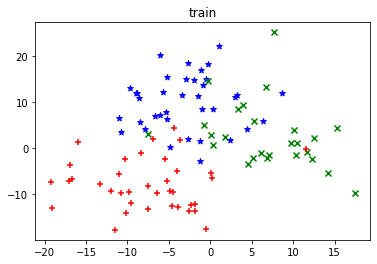

In [4]:
plt.figure()
y_unique = np.unique(y_train)
markers = '*x+'
colors = 'bgr'
for i in range(len(y_unique)):
  plt.scatter(x_train[y_train == y_unique[i], 0],
             x_train[y_train == y_unique[i], 1],
             marker=markers[i],
             c=colors[i])
plt.title('train')

plt.show()

KNN Model with Cluster boundaries

C:\Users\VISHWA~1\AppData\Local\Temp/ipykernel_20388/3752837145.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, y_predicted.reshape(100, 100), cmap='jet', alpha=0.2)


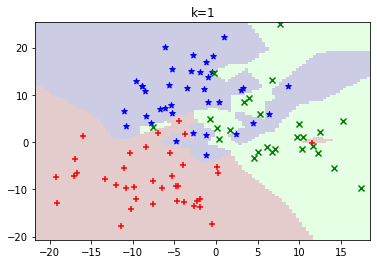

C:\Users\VISHWA~1\AppData\Local\Temp/ipykernel_20388/3752837145.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, y_predicted.reshape(100, 100), cmap='jet', alpha=0.2)


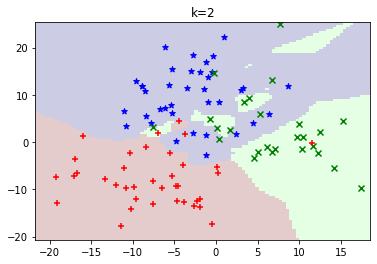

C:\Users\VISHWA~1\AppData\Local\Temp/ipykernel_20388/3752837145.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, y_predicted.reshape(100, 100), cmap='jet', alpha=0.2)


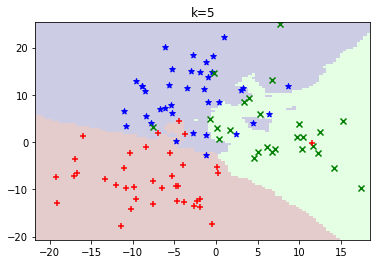

In [5]:
x = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 100)
y = np.linspace(np.min(x_test[:, 1]), np.max(x_test[:, 1]), 100)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]


# use the knn model to predict
for k in [1, 2, 5]:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  plt.figure()
  y_predicted = knn.predict(xy)
  
  plt.pcolormesh(xx, yy, y_predicted.reshape(100, 100), cmap='jet', alpha=0.2)

  for i in range(len(y_unique)):
      plt.scatter(x_train[y_train == y_unique[i], 0],
                 x_train[y_train == y_unique[i], 1],
                 marker=markers[i],
                 c=colors[i])
  plt.title('k=%s' % (k))

  plt.show()

Model Selection

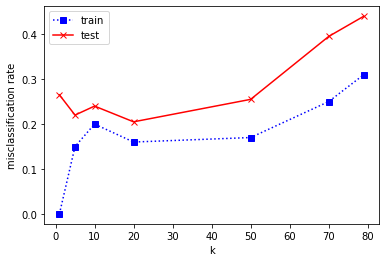

In [9]:
ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_errs.append(1 - knn.score(x_train, y_train))
  test_errs.append(1 - knn.score(x_test, y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')

plt.show()

#KNN on IRIS Dataset

##Data Pre-processing

In [11]:
iris = load_iris() # Load IRIS dataset from sckitlearn library

In [12]:
print(iris.feature_names)  # Iris has 4 feature and 3 output classes
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [13]:
X = iris.data
print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
y = iris.target

Split Dataset into train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
print(X_train.shape)
print(X_train[:5])

(100, 4)
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]


Visualize Iris dataset based on petal length and petal width

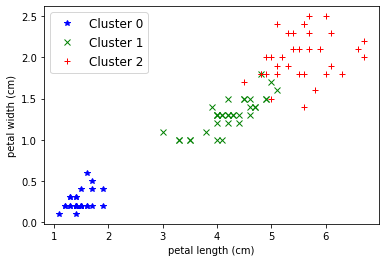

In [17]:
K=3
colors = 'bgr'
markers = '*x+'
fig, ax = plt.subplots()
for k in range(0, K):
  ax.plot(X_train[y_train==k, 2], X_train[y_train==k, 3], color=colors[k], \
          marker=markers[k], linestyle = 'None', label="Cluster {}".format(k))
  
ax.set(xlabel = iris.feature_names[2])
ax.set(ylabel = iris.feature_names[3])
plt.legend(loc="upper left", fontsize=12)
# save_fig("iris-2d-gmm")
plt.show()

##KNN Model

In [18]:
knn = KNN(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [19]:
y_pred=knn.predict(X_test)

#Extended Learning Question:

##Model Selection for Iris Dataset

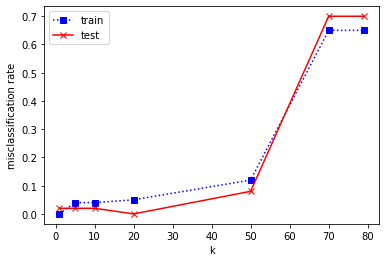

In [21]:
# Hint: Plot misclassification rate vs k and observe

ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
  knn = KNN(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_errs.append(1 - knn.score(X_train, y_train))
  test_errs.append(1 - knn.score(X_test, y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')

plt.show()

## The value of k should be somewhere between 5 to 10. As very small value of k will cause overfiffing and very large value will cause underfitting. And in the range between 5 to 10 the difference between test and train error is less.

##KNN From Scratch

In [ ]:
def get_nearest_nei(X_train,X_test):
    
    #input: X_train, y_train

    #Use Euclidian Distance Method

    #output: Distance Matrix: Distance of every point in X_test to every data point in X_train

In [ ]:
def KNN_scratch(k,X_train,y_train,X_test):
    # input: k: k nearest neighbours,
    # X_train and y_train: Training samples
    # X_test: points to be predicted

    #Step 1 : Get Distance Matrix
    dis_matrix = get_nearest_nei(X_train,X_test) # suppose n data samples then dis_matrix = (n,n)

    #Step 2: Find k Nearest Neighbours and their labels

    #Step 3: Find count of similiar labels from nearest neighbours

    #Step 4: Assign max couint labels as output to the point

    # output: y_test : cluster id for X_test

    return y_pred